# **PROJETO 2 - TITANIC**



## 1) definição do projeto e banco de dados

O Titanic foi o segundo de uma frota de três navios de luxo da empresa White Star Line. Com 269 m de comprimento e 28 m de largura, o Titanic era o maior navio da época. Sua construção começou em março de 1909 e terminou em maio de 1911. Em 10 de abril de 1912, ele partiu para sua primeira viagem, de Southampton, na Inglaterra, a Nova York, nos EUA. [(SuperInteressante, 2012)](https://super.abril.com.br/mundo-estranho/infografico-naufragio-do-titanic/).

A base de dados utilizada no presente projeto tem sua origem no site de competições de dados [Kaggle](https://www.kaggle.com/c/titanic) e refere-se a uma lista com informações de 891 passageiros. As informações disponíveis na internet sobre o Titanic apontam um total de 1316 passageiros e 885 tripulantes, ou seja, a base de dados deste projeto representa apenas 40,48% do total de pessoas embarcadas. 

Esse projeto tem como finalidade proporcionar a prática de Python e algumas de suas bibliotecas para a análise de dados.



## 2) Workflow 

a) Definição das questões      
b) Limpeza e teste da base de dados  
c) Análises e exploração dos dados  
d) Visualização dos dados   
e) conclusão  
f) referências  

## 3) definição das perguntas

Este projeto analisará a base de dados por duas óticas. A primeira se refere a uma análise geral do banco de dados e a segunda levará em consideração apenas o perfil dos sobreviventes do naufrágio.

As perguntas que se pretende responder são:
- Qual o perfil de sobrevivência ao naufrágio?  
- Como era distribuição dos passageiros por gênero antes do naufrágio?  
- Qual era o perfil de passageiros por classe social embarcada?  
- Qual o perfil de idade dos passageiros?  
- Qual o porto com maior número de passageiro embarcados?  
- Qual a relação gênero x idade dos sobreviventes?  
- Homens ou mulheres sobreviram mais ao naufrágio?  
- Qual a relação gênero x classe social?   
- Qual a idade média dos sobreviventes? A pessoa mais jovem e a mais idosa sobreviveram?   
- Qual a relação da idade e classe social?  
- A maior quantidade de passageiros que sobreviveram embarcaram em qual porto?  
- A maior quantidade de passageiros que sobreviverampertenciam a qual classe?  
- De que gênero eram os passageiros que mais sobreviveram?  
- Qual o preço das passagens por porto de embarque?  
 
Vamos tentar responder com o seguinte roteiro


### Análise geral do banco de dados
3.1) Perfil de sobrevivência  
3.2) Distribuição de gênero embarcado  
3.3) Distribuição da classe social embarcada, de acordo com a classe de passagem  
3.4) Perfil de idade dos passageiros  
3.5) Perfil de embarque por porto  


### Análise referente apenas aos sobreviventes
3.6) Cruzamento do gênero com:  
    3.6.a) idade  
    3.6.b) sobrevivencia  
    3.6.c) classe social   
      
     
3.7) Cruzamento da idade com:  
    3.7.a) sobrevivencia  
    3.7.b) classe social  
      
3.8) Porto de embarque com:  
    3.8.a) sobrevivencia    
    3.8.b) classe social   
    3.8.c) gênero 
    3.8.d) preço da passagem (fare)  
      





# Limpeza e teste da base de dados

In [139]:
#importando as bibliotecas, abrindo o arquivo e visualizando uma amostra dos dados 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

df_tit = pd.read_csv('titanic-data-6.csv')
df_tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Legenda:  

PassengerId = identificação do passageiro na lista  
Survived = Sobrevivência (0 = não, 1 = sim)   |
Pclass = classe dos passageiros (1 = Primeira classe, 2 = segunda classe, 3 = terceira classe)  
Name = Nome dos passageiros  
Sex = sexo  
Age = idade. As idades abaixo de 1 ano são representadas em fração decimal  
Sibsp  = # of siblings / spouses aboard the Titanic    
Parch  = # of parents / children aboard the Titanic    
Ticket = número do Ticket  
Fare  = Taxa da passagem    
Cabin = # da cabine    
Embarked =  Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)    

In [140]:
# Avaliando o tamanho do dataframe em linhas e colunas.# Avalia 
print('O dataframe do Titanic possui {} linhas e {} colunas'.format(df_tit.shape[0], df_tit.shape[1]))

O dataframe do Titanic possui 891 linhas e 12 colunas


In [141]:
# Conhecendo os tipos de dados de cada coluna
df_tit.info()

# Confirmando os valores faltantes de cada coluna. 
print('\nColunas com valores Faltantes: {0} \n'.format(df_tit.columns[df_tit.isnull().any()].values))

# Checar se há duplicação de dados:
print('Existem {} dados duplicados'.format(sum(df_tit.duplicated())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB

Colunas com valores Faltantes: ['Age' 'Cabin' 'Embarked'] 

Existem 0 dados duplicados


# Limpeza

Observa-se que a coluna "Age", "Cabin" e "Embarked" possuem valores faltantes.  

Ações a serem tomadas:  

a) Para a avaliação do perfil de idade iremos iremos tratar os dados apenas no momento da análise, pois iremos preencher os valores NANs através de médias por classes de idade. Obs: Essa atitude será tomada, pois ao preencher com a média geral, criaríamos uma tendência central que poderia não representar a realidade. Adiante será melhor explicado.   

b) Para a coluna "Embarked", iremos ignorar os valores faltantes, pois são apenas 2 observações, não influenciando significativamente a análise.

c) As colunas 'PasssengerId', 'Name','SibSp', 'Parch', 'Ticket','Cabin' serão descartadas pois não serão utilizadas na análise proposta.  

In [142]:
# Descartando colunas irrelevantes para a análise proposta
df_tit.drop(['PassengerId','Name','SibSp', 'Parch', 'Ticket','Cabin'],axis=1, inplace=True)

#Criaremos um novo dataframe para essa primeira edição dos dados

df_tit_edit = pd.DataFrame(df_tit)

df_tit_edit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 34.8+ KB


In [143]:
#Visualizando uma parte da tabela
df_tit_edit.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


Após essa limpeza, Iniciaremos as análises, que serão divididas em duas partes principais: 
Uma análise geral do perfil da base de dados e outra mais aprofundada cruzando informaçóes.

# Análise geral

## 3.1) Qual o perfil de sobrevivência da amostra?
Essa análise tem como objetivo identificar o percentual de sobreviventes da amostra


dos 891 passageiros referente à amostra:
342 sobreviveram
549 morreram


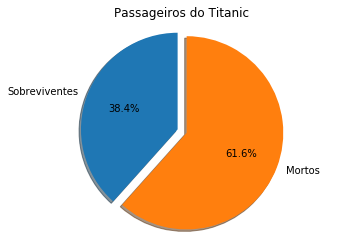

In [144]:
#Definindo o total de passageiros
df_total_pax = df_tit_edit.count()['Survived']

df_surv = df_tit_edit.query('Survived == 1').count()
df_surv = df_surv['Survived']

#extraindo o número total de passageiros que morreram.
df_deads = df_tit_edit.query('Survived == 0').count()
df_deads = df_deads['Survived']

#compilando as informações
print('dos {} passageiros referente à amostra:\n{} sobreviveram\n{} morreram'.format(df_total_pax, df_surv, df_deads))

# Gráfico da relação entre mortos e sobreviventes. 
# Gráfico da relação entre mortos e sobreviventes. 
label = ['Sobreviventes', 'Mortos']
qtd_survi_dead = [df_surv, df_deads]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(qtd_survi_dead, explode = explode, labels = label, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
ax1.set_title('Passageiros do Titanic')
plt.show()




## 3.2 Qual a distribuição entre os gêneros embarcados?


Sex
female    314
male      577
Name: Survived, dtype: int64
a proporção é de aproximadamente 2 homens para cada mulher embarcada no navio


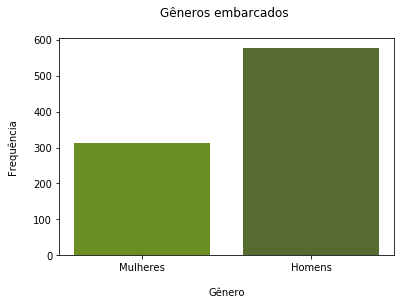

In [145]:
df_total_gender = df_tit_edit.groupby('Sex')['Survived'].count()
print(df_total_gender)

#proporção h/m
gender_proportion = (df_total_gender['male']/df_total_gender['female'])
print('a proporção é de aproximadamente', gender_proportion.round().astype(int), 'homens para cada mulher embarcada no navio')

# Gráfico da relação quantidade de frequência x gênero. 
gender = ['Mulheres','Homens']
plt.bar(gender, df_total_gender, color = ('olivedrab','darkolivegreen')); #link para a escala de cores nas referências
plt.title('Gêneros embarcados \n')
plt.xlabel('\nGênero')
plt.ylabel('Frequência\n');

- Embarcaram 577 homens e 314 mulheres  no Titanic

### 3.2.a) qual a relação entre gênero e sobrevivencia?

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64


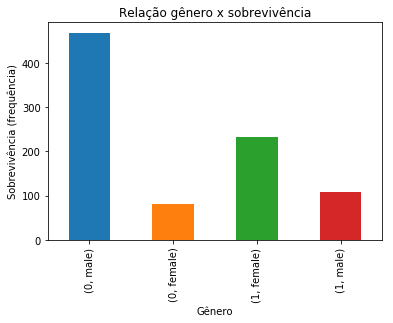

In [146]:
# Colocamos os gênero (sex) como index, para contar a quantidade de sobreviventes e mortos por gênero.
count_gender = df_tit_edit.groupby('Survived')['Sex'].value_counts()  
                                                            
print(count_gender)

count_gender.plot(kind='bar')
plt.plot = count_gender.plot(kind='bar') #Criando o gráfico
plt.title('Relação gênero x sobrevivência') #adicionando o título
plt.xlabel('Gênero')
plt.ylabel('Sobrevivência (frequência)')
plt.show()

O perfil geral nos mostra que:
- existiam mais homens do que mulheres a bordo do navio
- 468 homens morreram
- 233 mulheres sobreviveram

## 3.3 Classe social
Definição do perfil da classe social embarcada no navio

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64


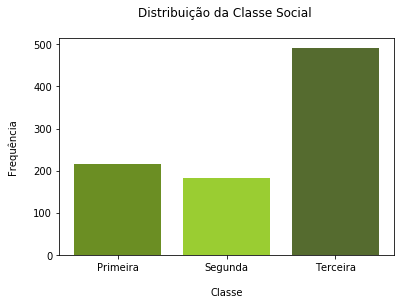

In [147]:
#Definição da classe social

df_pclass = df_tit_edit.groupby('Pclass')['Survived'].count()
print(df_pclass)

# Gráfico da relação frequência x classe social. 
classes = ['Primeira','Segunda', 'Terceira']
plt.bar(classes, df_pclass, color = ('olivedrab', 'yellowgreen', 'darkolivegreen')); #link para a escala de cores nas referências
plt.title('Distribuição da Classe Social \n')
plt.xlabel('\nClasse')
plt.ylabel('Frequência\n');


Existiam: 
- 216 passageiros na primeira classe
- 184 passageiros na segunda classe
- 491 na terceira classe

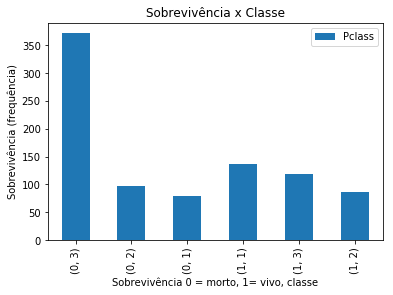

In [148]:
# Colocamos a Classe (Pclass) como index, para contar a quantidade de sobreviventes e mortos e distribuir graficamente
df_count_class = pd.DataFrame(df_tit_edit.groupby('Survived')['Pclass'].value_counts()) 


plt.plot = df_count_class.plot(kind='bar') #Criando o gráfico
plt.title('Sobrevivência x Classe') #adicionando o título
plt.xlabel('Sobrevivência 0 = morto, 1= vivo, classe')
plt.ylabel('Sobrevivência (frequência)')
plt.show()

A classe social com maior número de passageiros é a terceira classe, representando um total de 55% de passageiros embarcados. O maior percentual de passageiros mortos também é da terceira classe. O maior percentual de sobreviventes é da primeira classe.


## 3.4 Perfil de idade 


Inicialmente vamos analisar o range de idade e verificar a média geral. Essa média refere-se à base de dados com 744 informações de idade. 

min      0.420000
max     80.000000
mean    29.699118
Name: Age, dtype: float64


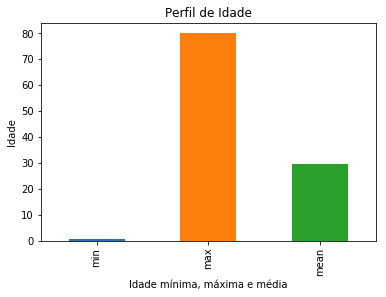

In [149]:
#definindo idade mínima, máxima e média
df_age = df_tit_edit.Age.agg(['min','max','mean'])
print(df_age)

plt.plot = df_age.plot(kind='bar') #Criando o gráfico
plt.title('Perfil de Idade') #adicionando o título
plt.xlabel('Idade mínima, máxima e média')
plt.ylabel("Idade")
plt.show()

A menor idade embarcada era um bebê de aproximadamente 5 meses de idade e a maior era um senhor de 80 anos de idade

### Abaixo vamos fazer uma breve análise de como fica a distribuição das idades usando .fillna com a média geral das idades para preencher os valores nulos

In [150]:
#Vamos completar o dataframe com a médias das idades e visualizar as informaçõe
tit_new_age = df_tit.fillna(df_tit['Age'].mean())
tit_new_age.info() #verificando se os valores foram substituídos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 34.8+ KB


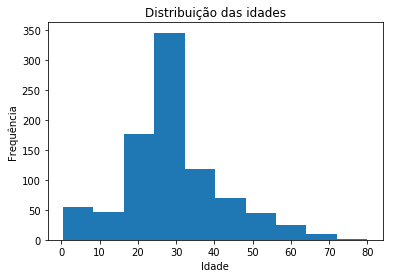

In [151]:
#Visualizando a distribuição das idades através de um histograma
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(tit_new_age['Age'], bins = 10, range = (tit_new_age['Age'].min(),tit_new_age['Age'].max()))
plt.title('Distribuição das idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Como imaginado, ao se distribuir 177 valores NANs pela média de idade, geramos uma tendência de distribuição central dos dados, o que pode não representar a realidade.

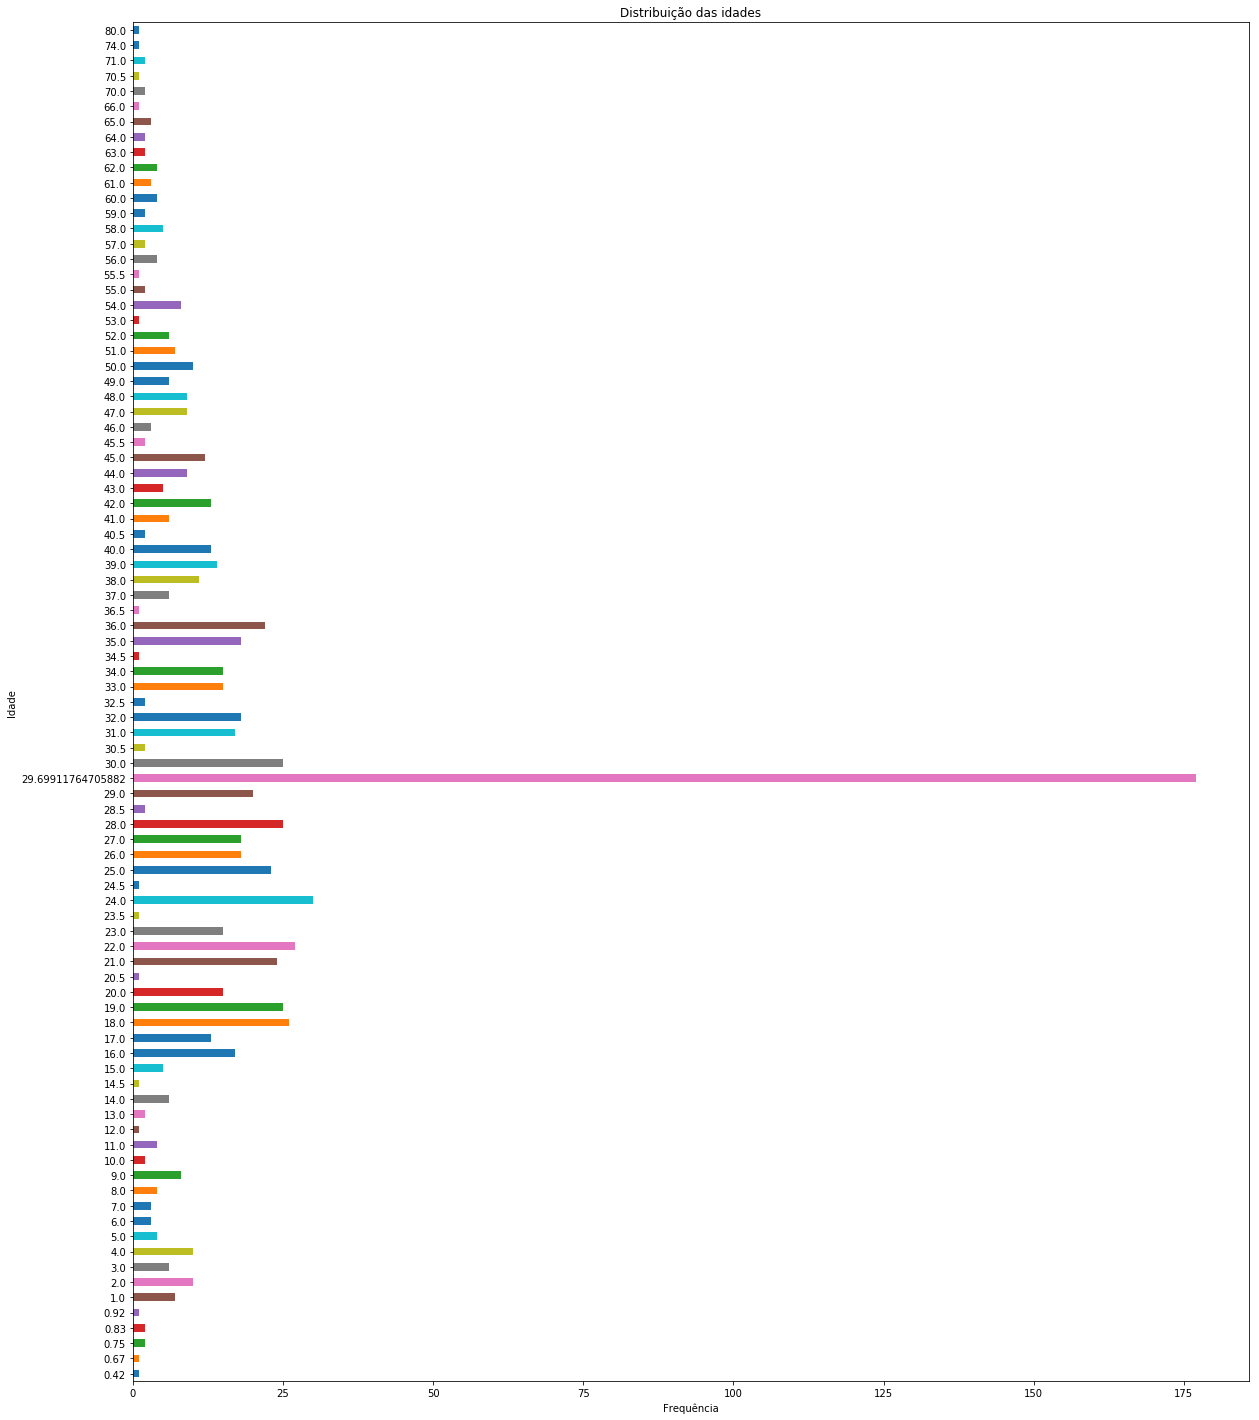

In [152]:
# Vamos ver essa distribuição em um gráfico de barras

plt.plot = tit_new_age['Age'].value_counts().sort_index().plot(kind='barh', figsize=(20,25)) #Criando o gráfico
plt.title('Distribuição das idades') #adicionando o título
plt.xlabel('Frequência')
plt.ylabel("Idade")
plt.show()


Como previsto, ao substituir os valores NAN pela médias das idades, criamos uma tendência central, que provavelmente não representa a realidade. Para corrigirmos isso, Não usaremos a função tit_new_age nas análises. Essa tendência é gerada porque aproximadamente 20% das observações são NANs.

Para uma análise mais representativa da realidade, criaremos classes de idade por frequência, e substituiremos os valores NAN proporcionalmente pelas médias da classe. Dessa forma, vamos dividir em 5 classes, a considerar:  

0 = criança  
1 = Adolescente/jovens  
2 = adultos  
3 = meia idade  
4 = terceira idade  




In [153]:
#Como não usaremos tit_new_age, vamos criar novo datadaframe usando fillna. 

#criando novo DF e ordenando os dados de idade por ordem crescente
df_tit_age = pd.DataFrame(df_tit.sort_values(['Age']))

#aqui fizemos essa ordenação por idade para deixar todos os valores NAN no final da tabela.

df_tit_age.copy()
df_tit_age.tail() #verificando se as idades NAN estão nas ultimas posições 

#vamos calcular a média das classes usando iloc. Essa média será usada para a distribuição das idades
#após ordenar os dados por idade, 

df_classe0 = df_tit_age.iloc[:101, 3].mean() #posição dos dados referentes a classe0 de idade
df_classe1 = df_tit_age.iloc[101:447, 3].mean() #posição dos dados referentes a classe1 de idade
df_classe2 = df_tit_age.iloc[447:635, 3].mean() #posição dos dados referentes a classe2 de idade
df_classe3 = df_tit_age.iloc[635:704, 3].mean() #posição dos dados referentes a classe3 de idade
df_classe4 = df_tit_age.iloc[704:713, 3].mean() #posição dos dados referentes a classe4 de idade

print(df_classe0)
print(df_classe1)
print(df_classe2)
print(df_classe3)
print(df_classe4)



8.095742574257427
24.540462427745666
39.327127659574465
55.07971014492754
69.16666666666667


Na tabela abaixo observamos a distribuição da idade média por classe, a frequência que representa dentro da classe (em percentual) e a quantidade de valores NANs que precisarão ser substituídos para completar o dataframe em cada classe.

|  classe de idade | categoria  | idade média  | df_tit   | Substituir NAN  | 
|---|---|---|---|---|
|0   | criança  |  8.095742574257427 | 14%  | 25 |
| 1  | adolescente/jovens  | 24.540462427745666  |48%   |  85 |
|  2 | adultos  | 39.327127659574465  | 26%  | 46 |
|  3 | meia idade  | 55.07971014492754  |10%   |  18 |
|  4 | terceira idade  |69.16666666666667  | 2%  | 3  |

Obs1: As médias de idade foram calculadas com base nas 744 observações de idade, bem como os percentuais  
Obs2: a coluna "Substituir NAN" foi calculada usando proporção das classes para chegarmos ao total de 891 passageiros  


In [154]:
#ressetando o index para que possamos usar corretamente a função LOC
#como anteriormente ordenamos o DF por idade, o indice original ficou fora de ordem. Precisaremos nesse caso ressetar o índice para que possamos
#usar corretamente a chamada .loc mais adiante
df_tit_clean = df_tit_age.reset_index()


In [155]:
#encontrando as posições NANS que queremos substituir pelas médias das classes de idade

df_tit_clean.loc[714:738] = df_tit_clean.loc[714:738].fillna(8.095742574257427)
df_tit_clean.loc[738:823] = df_tit_clean.loc[738:823].fillna(24.540462427745666)
df_tit_clean.loc[823:869] = df_tit_clean.loc[823:869].fillna(39.327127659574465)
df_tit_clean.loc[869:887] = df_tit_clean.loc[869:887].fillna(55.07971014492754)
df_tit_clean.loc[887:] = df_tit_clean.loc[887:].fillna(69.16666666666667
);

In [156]:
#criando um novo dataframe para garantir que os valores NAN foram substituídos
df_tit_clean = pd.DataFrame(df_tit_clean)

df_tit_clean.loc[713:720] #visualizar uma parte da tabela para ver se a substituição está correta

,index,Survived,Pclass,Sex,Age,Fare,Embarked
713,630,1,1,male,80.000000,30.0000,S
714,5,0,3,male,8.095743,8.4583,Q
715,17,1,2,male,8.095743,13.0000,S
716,19,1,3,female,8.095743,7.2250,C
717,26,0,3,male,8.095743,7.2250,C
718,28,1,3,female,8.095743,7.8792,Q
719,29,0,3,male,8.095743,7.8958,S
720,31,1,1,female,8.095743,146.5208,C


In [157]:
df_tit_clean.info() #as substituições foram feitas?


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
index       891 non-null int64
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 41.8+ KB


Vamos gerar um histograma e um gráfico de barras horizontal para garantir que as inserções das médias estão corretas.

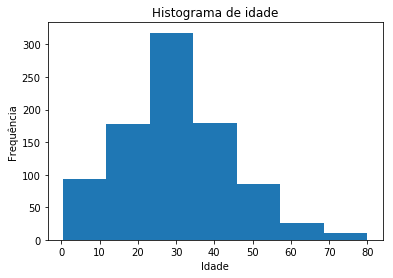

In [158]:
#visualizando histograma com a nova distribuição das frequências por classes de idade

plt.plot = df_tit_clean['Age'].plot(kind='hist', bins = 7) #Criando o gráfico
plt.title('Histograma de idade') #adicionando o título
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Distribuição das idades em um histograma. Observa-se que a faixa com maior número de passageiros é entre 25 e 35 anos de idade

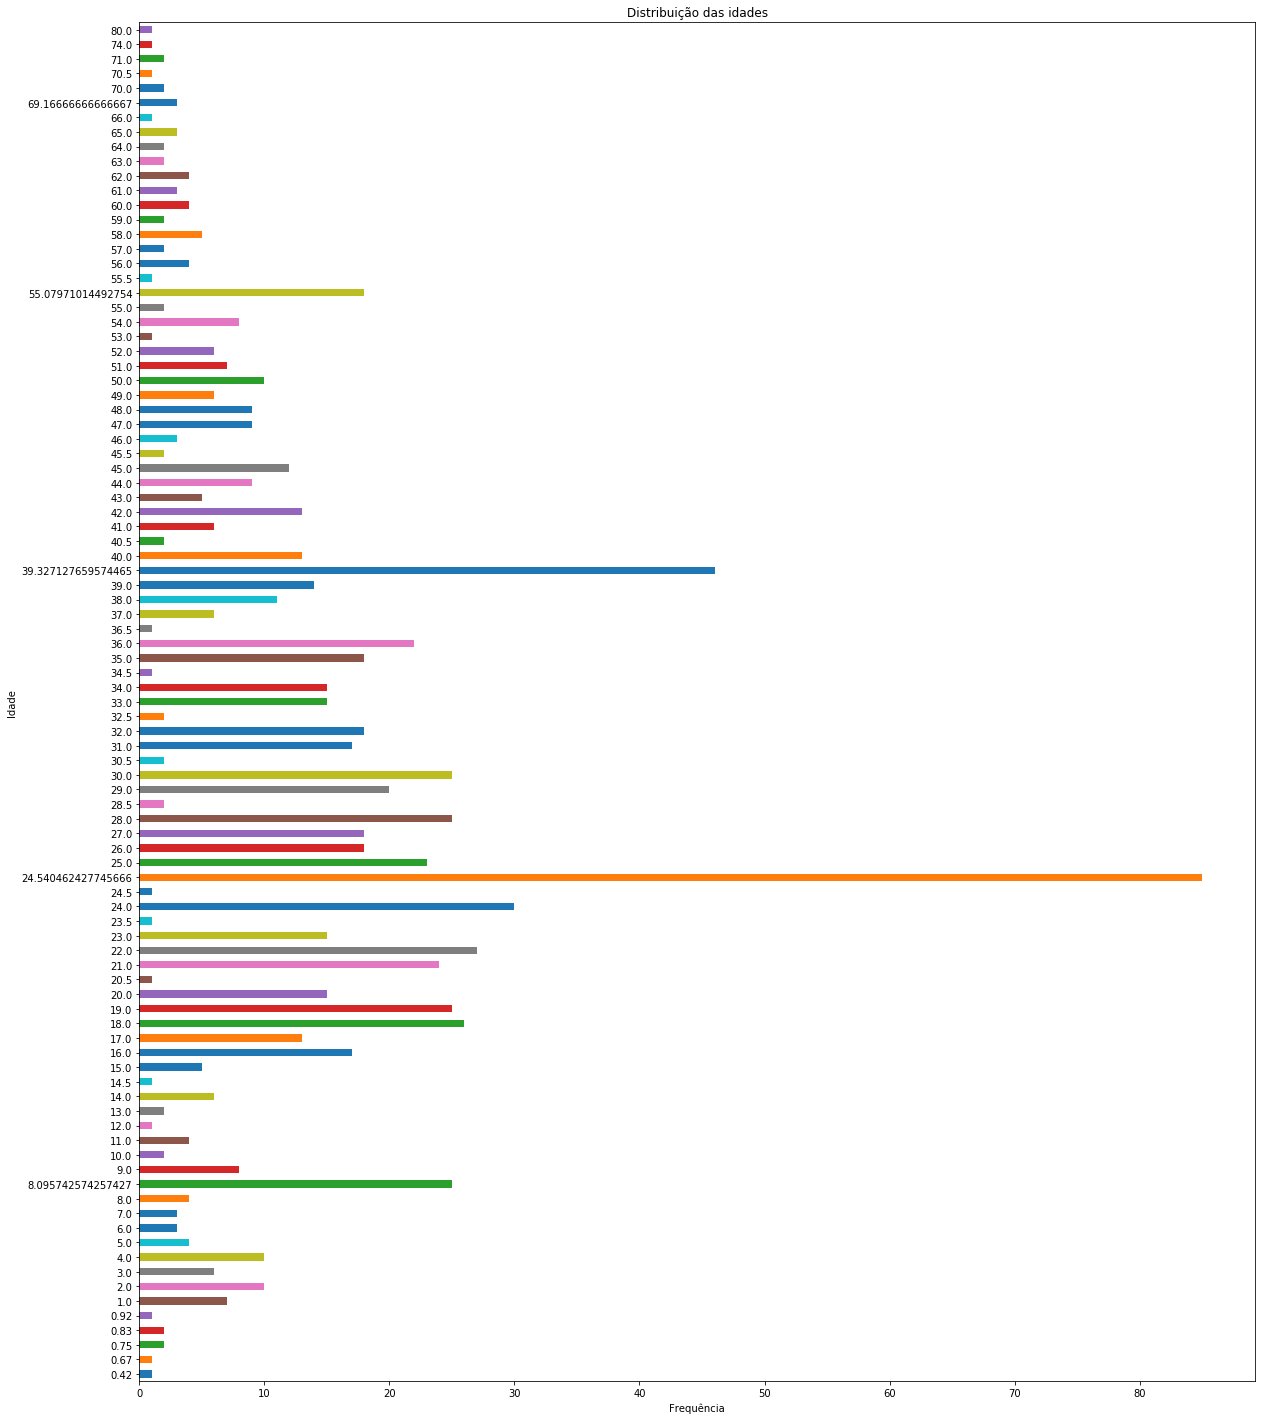

In [159]:
#plot idade com médias por classe
df_tit_clean['Age'].value_counts().sort_index().plot(kind='barh', figsize=(20,25))

plt.plot = df_tit_clean['Age'].value_counts().sort_index().plot(kind='barh', figsize=(20,25)) #Criando o gráfico
plt.title('Distribuição das idades') #adicionando o título
plt.xlabel('Frequência')
plt.ylabel("Idade")
plt.show()

A inserção das médias das classes de idade nos proporcionou manter a tendência de distribuição da idade semelhante ao dataframe original. Dessa forma nos possibilita uma análise mais assertiva ao se cruzar informações de idade.

Abaixo veremos como ficou a nova distribuição de frequência por classe de idade

In [160]:
#criar agrupamento por classe de frequencia

df_tit_clean['Classe'] = pd.cut(df_tit_clean['Age'], 5)
df_tit_clean[['Classe', 'Survived']].groupby(['Classe'], as_index=False).count().sort_values(by='Classe', ascending=True)
print(df_tit_clean[['Classe', 'Survived']].groupby(['Classe'], as_index=False).count().sort_values(by='Classe', ascending=True))




             Classe  Survived
0    (0.34, 16.336]       125
1  (16.336, 32.252]       431
2  (32.252, 48.168]       234
3  (48.168, 64.084]        87
4    (64.084, 80.0]        14



|  classe de idade | categoria  | idade média  | Freq. Abs. antes  | Freq. Abs. Depois  | 
|---|---|---|---|---|
|0   | criança  |  8.095742574257427 | 100  | 125 |
| 1  | adolescente/jovens  | 24.540462427745666  |346   |  431 |
|  2 | adultos  | 39.327127659574465  | 188  | 234 |
|  3 | meia idade  | 55.07971014492754  |69   |  87 |
|  4 | terceira idade  |69.16666666666667  | 11  | 14  |
|  Total|| | **744**  | **891**  |

### Agora que temos o dataframe completo com idades, vamos fazer algumas análises do perfil geral correlacionando com idade



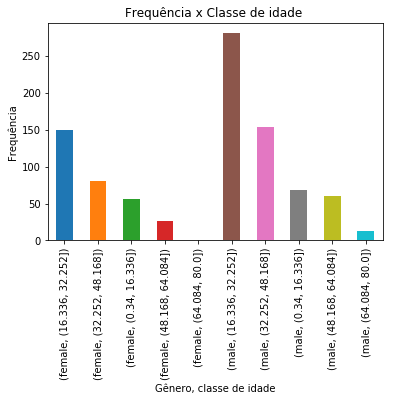

In [161]:
#Qual a distribuição de gênero por classe de idade?
age_sex = df_tit_clean.groupby('Sex')['Classe'].value_counts()  
                                                            
plt.plot = age_sex.plot(kind='bar') #Criando o gráfico
plt.title('Frequência x Classe de idade ') #adicionando o título
plt.xlabel('Gênero, classe de idade')
plt.ylabel("Frequência")
plt.show()

- Para ambos os gêneros embarcados no navio, a classe de idade que possui o maior número de passageiros é de 16 a 32 anos.
- o menor número de passageiros eram idosos (faixa de 64 a 80 anos) em ambos os sexos

In [162]:
#Visualizando as idades máximas do passageiros embarcados no Titanic, separando por sexo, classe e porto de embarque
table_age_sex = pd.pivot_table(df_tit_clean, values='Age', index=['Sex', 'Pclass'],columns=['Embarked'], aggfunc=np.max)
table_age_sex

Embarked               C          Q          S
Sex    Pclass                                 
female 1       60.000000  33.000000  63.000000
       2       28.000000  30.000000  57.000000
       3       45.000000  39.327128  69.166667
male   1       71.000000  44.000000  80.000000
       2       39.327128  57.000000  70.000000
       3       55.079710  70.500000  74.000000

Considerando o sexo masculino, o passageiro de maior idade era um homem de 80 anos de idade e estava alocado na primeira classe do navio tendo embarcado em Southamton. Para o sexo feminino a idade era 69 anos, estava na primeira classe e também embarcou em Southamton.

In [163]:
#Visualizando as idades mínimas do passageiros embarcados no Titanic, separando por sexo, classe e porto de embarque
table_age_sex = pd.pivot_table(df_tit_clean, values='Age', index=['Sex', 'Pclass'],columns=['Embarked'], aggfunc=np.min)
table_age_sex

Embarked              C          Q     S
Sex    Pclass                           
female 1       8.095743  33.000000  2.00
       2       3.000000  24.540462  2.00
       3       0.750000   8.095743  1.00
male   1       8.095743  44.000000  0.92
       2       1.000000  57.000000  0.67
       3       0.420000   2.000000  1.00

Com essa tabela podemos verificar que o bebê de aproximadamente 5 meses de idade (0,42 anos) embarcou com sua família no porto de Cherbourg e era do sexo masculino. Poucas crianças embarcaram no porto de Queenstown, sendo que das que embarcaram nesse porto, nenhuma pertencia à primeira e segunda classe.

# 3.5 Perfil por porto de embarque

A quantidade de passageiros embarcados nos portos são:
» Cherbourg 168 pessoas 
» Queenstown 77 pessoas 
» Southampton 644 pessoas 
» Total 889 pessoas 


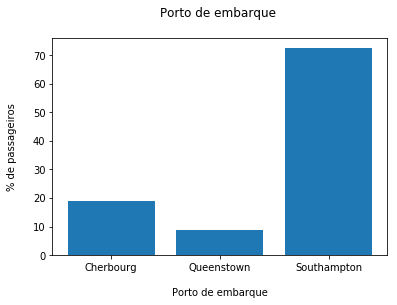

In [164]:
#Isolando a coluna Embarque (embarked) para realizar a separação e contagem dos portos. 
df_embarked = df_tit_clean['Embarked']

# Somando o total de passageiros embarcados em todos os portos
total_embarked = df_embarked.value_counts().sum()

# Variáveis do total de contagem de cada porto.
total_pass_s = 0
total_pass_c = 0
total_pass_q = 0


# Loop para separação e contagem de passageiros por porto.  
for i in df_embarked:
    if i == 'S':
        total_pass_s += 1 
    elif i == 'C':
        total_pass_c += 1
    elif i == 'Q':
        total_pass_q += 1

# Exibir a quantidade de passageiro por porto.  
print('A quantidade de passageiros embarcados nos portos são:\n» Cherbourg {} pessoas \n» Queenstown {} pessoas \n» Southampton {} pessoas \n» Total {} pessoas '
      .format(total_pass_c, total_pass_q, total_pass_s, total_embarked))

# Gráfico da relação quantidade de passageiro x porto de embarque. 
qtd_embarked = [total_pass_c/total_embarked*100, total_pass_q/total_embarked*100, total_pass_s/total_embarked*100]
ports = ['Cherbourg','Queenstown','Southampton']
plt.bar(ports, qtd_embarked);
plt.title('Porto de embarque \n')
plt.xlabel('\nPorto de embarque')
plt.ylabel('% de passageiros\n');






Com base na análise acima, fica evidente que o porto de Southamton foi o responsável pelo maior número de embarque dos passageiros da base de dados. Isso acontece provavelmente em razão de ser o porto de partida do Titanic. Na sequência o porto responsável pelo segundo maior número de embarques é Cherbourg, que coincide com a primeira parada do navio e o porto com menor embarques é o de Queenstown, aonde o Titanic ancorou pela segunda e última vez.

Partida: Southampton, 644 passageiros  
1a parada: Cherbourg, 168 passageiros  
2a parada: Queenstown, 889 passageiros    

*lembrando que aqui foram desprezadas informações referentes a dois passageiros que não possuíam essa informação na base de dados.

PS: Outra maneira de visualizar essa informação seria assim: 
```
#Analisando o perfil geral dos passageiros por porto de embarque
df_embark = df_tit_edit.groupby('Embarked')['Survived'].count()
print(df_embark)

#Gráfico da relação quantidade de passageiro x porto de embarque. 
ports = ['Cherbourg','Queenstown','Southampton']
plt.bar(ports, df_embark, color = ('olivedrab','yellowgreen','darkolivegreen')); #link para a escala de cores nas referências
plt.title('Passageiros embarcados \n')
plt.xlabel('\nPorto de embarque')
plt.ylabel('nº de passageiros\n');
```

In [165]:
#Visualizando as frequência de passageiros embarcados no Titanic, separando por sexo, sobrevivência e porto de embarque
table_emb = pd.pivot_table(df_tit_clean, values='Pclass', index=['Sex', 'Survived'],columns=['Embarked'], aggfunc=np.size)
table_emb

Embarked          C   Q    S
Sex    Survived             
female 0          9   9   63
       1         64  27  140
male   0         66  38  364
       1         29   3   77

Nessa tabela observa-se a distribuição dos passageiros por porto de embarque, agrupados por gênero e sobrevivência. O maior número de passageiros mortos (364 pessoas) embarcaram no porto de Southamton e eram do sexo masculino

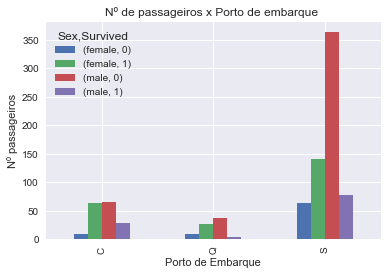

In [166]:
#relação entre sexo e sobrevivência por porto de embarque
sns.set()  # usando Seaborn 
df_tit_clean.pivot_table(index='Embarked', columns=('Sex', 'Survived'), aggfunc='size').plot(kind='bar')
plt.title('Nº de passageiros x Porto de embarque ')
plt.xlabel('Porto de Embarque');
plt.ylabel('Nº passageiros');



Pode-se verificar que o maior número de mortes são referentes a homens que embarcaram no porto de Southamton e que o maior número de sobreviventes mulheres também embarcou naquele porto.

- A taxa de mortalidade de homens é mais alta do que a de mulheres nos três portos de embarque.
- A taxa de sobrevivência de mulheres é mais alta do que a de homens nos três portos de embarque


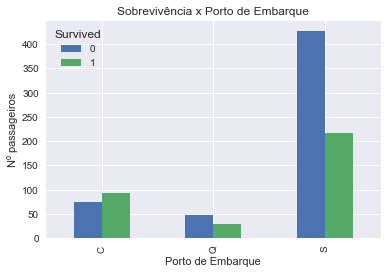

In [167]:
#visualizando a relação entre sobrevivência e porto de embarque
sns.set()  # usando Seaborn 
df_tit_clean.pivot_table(index='Embarked', columns='Survived', aggfunc='size').plot(kind='bar')
plt.title('Sobrevivência x Porto de Embarque')
plt.xlabel('Porto de Embarque');
plt.ylabel('Nº passageiros');

O maior número absoluto de sobreviventes foi de passageiros embarcados no porto de Southamton.

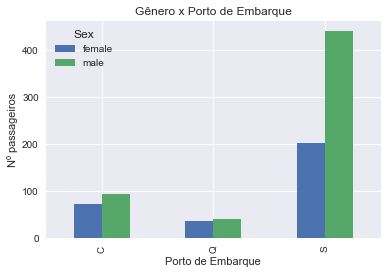

In [168]:
#visualizando sobrevivência por gênero e porto de embarque
sns.set()  # usando Seaborn 
df_tit_clean.pivot_table(index='Embarked', columns='Sex', aggfunc='size').plot(kind='bar')
plt.title('Gênero x Porto de Embarque')
plt.xlabel('Porto de Embarque');
plt.ylabel('Nº passageiros');

Nos três portos o maior número de passageiros embarcados eram homens.

# 3.6)Análise do perfil dos sobreviventes ao Naufrágio 

As análises a seguir referem-se somente ao cruzamento das informações dos sobreviventes. Para isso criaremos um  novo dataframe


In [169]:
#Criando novo dataframe para analisarmos os dados referentes somente à sobreviventes
df_surv = pd.DataFrame(df_tit_clean.query('Survived == 1'))
df_surv.info() #visualizando as infos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 885
Data columns (total 8 columns):
index       342 non-null int64
Survived    342 non-null int64
Pclass      342 non-null int64
Sex         342 non-null object
Age         342 non-null float64
Fare        342 non-null float64
Embarked    340 non-null object
Classe      342 non-null category
dtypes: category(1), float64(2), int64(3), object(2)
memory usage: 19.1+ KB


# 3.6.a) Qual a relação entre gênero e idade dos sobreviventes?

Sex
female    28.326936
male      27.358767
Name: Age, dtype: float64


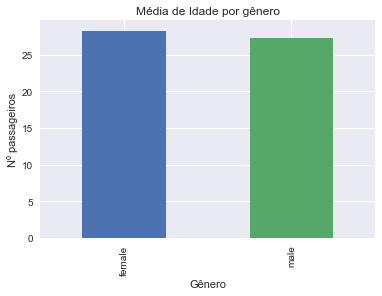

In [170]:
df_sex_age_surv = df_surv.groupby('Sex')['Age'].mean()
print(df_sex_age_surv)

df_sex_age_surv.plot('bar')
plt.title('Média de Idade por gênero')
plt.xlabel('Gênero');
plt.ylabel('Nº passageiros');

A idade média dos sobreviventes ao naufrágio era:
- mulheres 28 anos
- homens 27 anos

In [171]:
#Visualizando as idades mínimas e máximas dos sobreviventes do passageiros embarcados no Titanic, separando por sexo e classe
table_surv_min = pd.pivot_table(df_surv, values='Age', index=['Sex'],columns=['Pclass'], aggfunc=np.min)
table_surv_min

Pclass,1,2,3
Sex,,,
female,8.095743,2.00,0.75
male,0.920000,0.67,0.42


- O menino mais novo do navio possuía 0,42 anos e estava na terceira classe.
- A menina mais nova também era da terceira classe e tinha 0,75 anos.
- A menina mais nova da primeira classe tinha 8 anos de idade

In [172]:
#Visualizando as idades máximas do passageiros embarcados no Titanic, separando por sexo, classe.
table_surv_max = pd.pivot_table(df_surv, values='Age', index=['Sex'],columns=['Pclass'], aggfunc=np.max)
table_surv_max

Pclass,1,2,3
Sex,,,
female,63.0,55.0,63.00000
male,80.0,62.0,55.07971


- o homem mais velho do navio tinha 80 anos de idade e estava na primeira classe
- tanto na primeira como na terceira, a passageira mulher mais velha tinha 63 anos de idade

min     0.42
max    80.00
Name: Age, dtype: float64


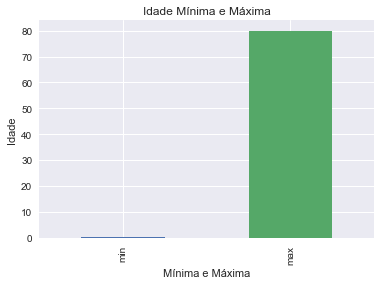

In [173]:
#definindo idade mínima, máxima
df_minmax_age = df_surv.Age.agg(['min','max'])
print(df_minmax_age)
df_minmax_age.plot(kind = 'bar')
plt.title('Idade Mínima e Máxima')
plt.xlabel('Mínima e Máxima');
plt.ylabel('Idade');

Nas primeiras análises do banco de dados tivemos uma visão geral do perfil mínimo e máximo de idade dos passageiros. A partir dessa análise somente dos sobreviventes, podemos concluir que tanto o bebê mais novo como o senhor mais idoso sobreviveram ao naufrágio do Titanic e ambos eram do sexo masculino. O bebê pertencia à terceira classe e o senhor à primeira.

# 3.6.b) Qual a relação entre gênero e sobrevivência?


Survived  Sex   
1         female    233
          male      109
Name: Sex, dtype: int64


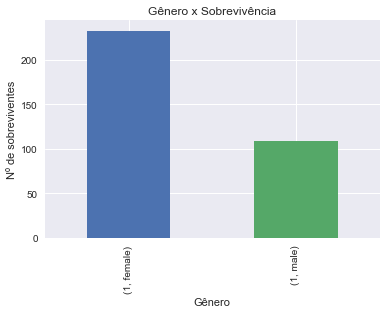

In [174]:
# Colocamos os gênero (sex) como index, para contar a quantidade de sobreviventes e mortos por gênero.
count_gender2 = df_surv.groupby('Survived')['Sex'].value_counts()  
                                                            
print(count_gender2)

count_gender2.plot(kind='bar')
plt.title('Gênero x Sobrevivência')
plt.xlabel('Gênero');
plt.ylabel('Nº de sobreviventes');

Esse gráfico nos evidencia que o número de mulheres sobreviventes é maior do que o número de homens, sendo 233 mulheres e 109 homens.

# 3.6.c) Qual a relação do gênero com a classe social?


Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Sex, dtype: int64


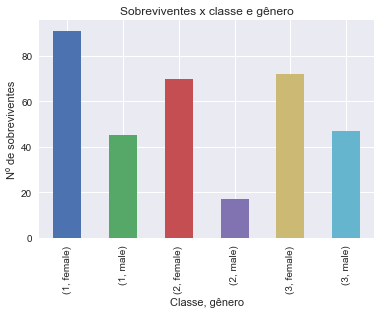

In [175]:
#visualizando sobreviventes por gênero e classe social
gender_class = df_surv.groupby('Pclass')['Sex'].value_counts()  
                                                            
print(gender_class)

gender_class.plot(kind='bar')
plt.title('Sobreviventes x classe e gênero')
plt.xlabel('Classe, gênero');
plt.ylabel('Nº de sobreviventes');

O gênero que possui um maior número de sobreviventes é feminino e se distribui em todas as classes. Ao se comparar com o gênero masculino, nota-se proporcionalmente os homens da primeira classe sobreviveram mais do que os das demais classes, apesar de o número absoluto de homens sobreviventes da terceira classe é um pouco maior.

# 3.7.a) Qual a relação da idade com a taxa de sobrevivência?

Classe
(0.34, 16.336]       67
(16.336, 32.252]    152
(32.252, 48.168]     89
(48.168, 64.084]     33
(64.084, 80.0]        1
Name: Age, dtype: int64


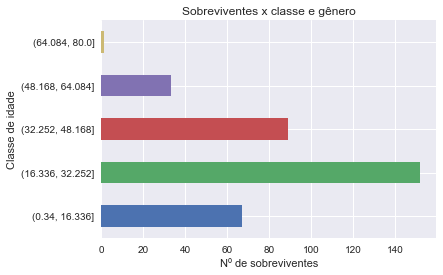

In [176]:
#Analisando o perfil de idade/taxa de sobrevivencia
df_age_surv = df_surv.groupby('Classe')['Age'].count()
print(df_age_surv)

df_age_surv.plot(kind='barh')

plt.title('Sobreviventes x classe e gênero')
plt.xlabel('Nº de sobreviventes');
plt.ylabel('Classe de idade');

o perfil de idade com maior número de sobreviventes possui entre 16 e 32 anos de idade, totalizando 152 pessoas.

# 3.7.b Qual a relação da idade com classe social?

Pclass
1    34.678300
2    25.989890
3    21.890021
Name: Age, dtype: float64


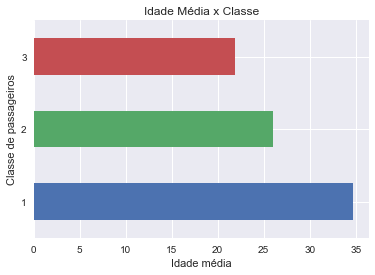

In [177]:
#Analisando o perfil de idade média/classe
df_age_class = df_surv.groupby('Pclass')['Age'].mean()
print(df_age_class)

df_age_class.plot(kind='barh')
plt.title('Idade Média x Classe')
plt.xlabel('Idade média');
plt.ylabel('Classe de passageiros');



A média de idades dos passageiros que sobreviveram ao naufrágio é assim distribuída:
- 1ª classe = 34 anos de idade
- 2ª classe = 25 anos de idade
- 3ª classe = 21 anos de idade


# 3.8.a) Porto embarcado e Sobrevivência




Survived  Embarked
1         S           217
          C            93
          Q            30
Name: Embarked, dtype: int64


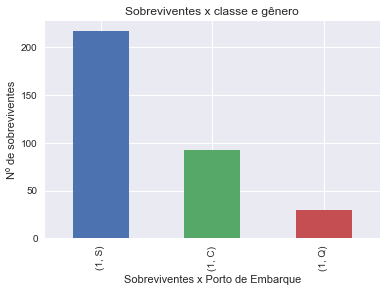

In [178]:
port_emb = df_surv.groupby('Survived')['Embarked'].value_counts()  
                                                            
print(port_emb)

port_emb.plot(kind='bar')

plt.title('Sobreviventes x classe e gênero')
plt.xlabel('Sobreviventes x Porto de Embarque');
plt.ylabel('Nº de sobreviventes');

Dos sobreviventes, 217 embarcaram em Southamtom, 93 em Cherbourg e 30 em Queenstown.

# 3.8.b) Porto/Classe social


Pclass  Embarked
1       S           74
        C           59
        Q            1
2       S           76
        C            9
        Q            2
3       S           67
        Q           27
        C           25
Name: Embarked, dtype: int64


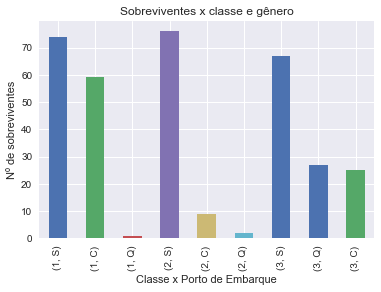

In [179]:
port_emb2 = df_surv.groupby('Pclass')['Embarked'].value_counts()  
                                                            
print(port_emb2)

port_emb2.plot(kind='bar')
plt.title('Sobreviventes x classe e gênero')
plt.xlabel('Classe x Porto de Embarque');
plt.ylabel('Nº de sobreviventes');

A maior frequência de pessoas que sobreviveram ao naufrágio embarcaram no porto de Southamton, independente da classe. Ao se analisar o porto de Queenstown, o maior número de soreviventes é da terceira classe e a mesma tendência acontece com o porto de Cherbourg.

# 3.8.c) Porto/gênero

Sex     Embarked
female  S           140
        C            64
        Q            27
male    S            77
        C            29
        Q             3
Name: Embarked, dtype: int64


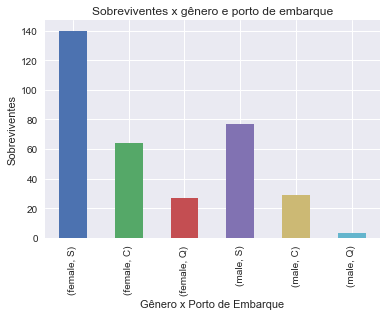

In [180]:
#criando gráfico para analisarmos sobrevivntes distribuidos por gênero e porto de embarque
port_emb3 = df_surv.groupby('Sex')['Embarked'].value_counts()  
                                                            
print(port_emb3)

port_emb3.plot(kind='bar')
plt.title('Sobreviventes x gênero e porto de embarque')
plt.xlabel('Gênero x Porto de Embarque');
plt.ylabel('Sobreviventes');

O maior número de sobreviventes do sexo feminino, sendo que 140 haviam partido do porto de Southamton, 64 de Cherbourg e 27 de Queenstown. Ao se analisar os homens, 77 embarcaram em Southamton, 29 em Cherbourg, e 3 em Queenstown.

# 3.8.d) Porto/preço

Pclass
1    95.608029
2    22.055700
3    13.694887
Name: Fare, dtype: float64


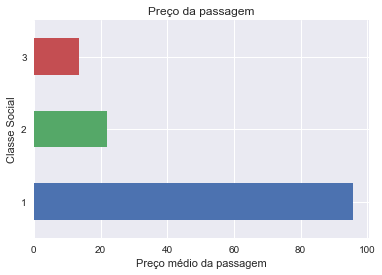

In [181]:
port_fare = df_surv.groupby('Pclass')['Fare'].mean() 
                                                            
print(port_fare)

port_fare.plot(kind='barh')
plt.title('Preço da passagem')
plt.xlabel('Preço médio da passagem');
plt.ylabel('Classe Social');

O preço médio da passagem  da primeira classe foi de U\$ 95.608, na segunda U\$ 22.055 e a terceira custou em média U\$ 13.694 (moeda da época)

In [182]:
#definindo preços mínimo, médio e máximo por porto de embarque (somente dos sobreviventes)
port_fare2 = df_surv.groupby('Pclass')['Fare'].min() 
port_fare3 = df_surv.groupby('Pclass')['Fare'].max()
port_fare4 = df_surv.groupby('Pclass')['Fare'].mean()     
print(port_fare2) 
print(port_fare3)
print(port_fare4)


Pclass
1    25.9292
2    10.5000
3     0.0000
Name: Fare, dtype: float64
Pclass
1    512.3292
2     65.0000
3     56.4958
Name: Fare, dtype: float64
Pclass
1    95.608029
2    22.055700
3    13.694887
Name: Fare, dtype: float64


- A passagem mais cara entre os sobreviventes custou U\$512.329.
- A passagem mais barata entre os sobreviventes foi U\$0,00. Não se sabe a origem desse valor (sorteio, embarque ilegal?)
- A preço mínimo da passagem da primeira classe é 54% mais barata que a passagem mais cara da terceira classe.


In [184]:
# definindo o valor médio das passagens através de uma função

L = df_tit_edit['Fare'].values.tolist()

def mean_fare(L):
    """
    A função mean_fare foi criada para calcular o valor médio das passagens através de uma função.
    input = soma de todas as tarifas de passagens da lista
    output = total da soma dividido pelo comprimento da lista
    
    """
    
    total = 0
    for e in L:
        total += e
    return total/len(L)
print('O valor médio das passagens, considerando todas as classes foi de: U$', mean_fare(L))


O valor médio das passagens, considerando todas as classes foi de: U$ 32.2042079685746


# Conclusões




- Dos 891 passageiros referente à amostra 342 sobreviveram e 549 morreram;
- Do total de pessoas embarcados, 314 eram mulheres e 577 eram homens, ou seja, existiam mais homens do que mulheres a bordo do navio mais homens morreram e mais mulheres sobreviveram;
- A classe social com maior número de passageiros é a terceira classe, representando um total de 55% de passageiros embarcados;
- O maior percentual de passageiros mortos também é da terceira classe.O maior percentual de sobreviventes é da primeira classe.;
- A menor idade embarcada era um bebê de aproximadamente 5 meses de idade e a maior era um senhor de 80 anos de idade
- Considerando o sexo masculino, o passageiro de maior idade era um homem de 80 anos de idade e estava alocado na primeira classe do navio tendo embarcado em Southamton. Para o sexo feminino a idade era 69 anos, estava na primeira classe e também embarcou em Southamton;
- O bebê de aproximadamente 5 meses de idade (0,42 anos) embarcou com sua família no porto de Cherbourg e era do sexo masculino. Poucas crianças embarcaram no porto de Queenstown, sendo que das que embarcaram nesse porto, nenhuma pertencia à primeira e segunda classe;
- O porto de Southamton foi o responsável pelo maior número de embarque dos passageiros da base de dados. Isso acontece provavelmente em razão de ser o porto de partida do Titanic. Na sequência o porto responsável pelo segundo maior número de embarques é Cherbourg, que coincide com a primeira parada do navio e o porto com menor embarques é o de Queenstown, aonde o Titanic ancorou pela segunda e última vez;
- Pode-se verificar que o maior número de mortes são referentes a homens que embarcaram no porto de Southamton e que o maior número de sobreviventes mulheres também embarcou naquele porto;
- A taxa de mortalidade de homens é mais alta do que a de mulheres nos três portos de embarque. A taxa de sobrevivência de mulheres é mais alta do que a de homens nos três portos de embarque;
- A idade média dos sobreviventes ao naufrágio era: mulheres 28 anos e homens  27 anos;
- Nas primeiras análises do banco de dados tivemos uma visão geral do perfil mínimo e máximo de idade dos passageiros. A partir dessa análise somente dos sobreviventes, podemos concluir que tanto o bebê mais novo como o senhor mais idoso sobreviveram ao naufrágio do Titanic e ambos eram do sexo masculino. O bebê pertencia à terceira classe e o senhor à primeira;
- O gênero que possui um maior número de sobreviventes é feminino e se distribui em todas as classes. Ao se comparar com o gênero masculino, nota-se proporcionalmente os homens da primeira classe sobreviveram mais do que os das demais classes, apesar de o número absoluto de homens sobreviventes da terceira classe é um pouco maior;
-  o perfil de idade com maior número de sobreviventes possui entre 16 e 32 anos de idade, totalizando 152 pessoas.
- A média de idades dos passageiros que sobreviveram ao naufrágio é assim distribuída: 
    - 1ª classe = 34 anos de idade
    - 2ª classe = 25 anos de idade
    - 3ª classe = 21 anos de idade

- A maior frequência de pessoas que sobreviveram ao naufrágio embarcaram no porto de Southamton, independente da classe. Ao se analisar o porto de Queenstown, o maior número de sbreviventes é da terceira classe e a mesma tendência acontece com o porto de Cherbourg;

- O maior número de sobreviventes do sexo feminino, sendo que 140 haviam partido do porto de Southamton, 64 de Cherbourg e 27 de Queenstown. Ao se analisar os homens, 77 embarcaram em Southamton, 29 em Cherbourg, e 3 em Queenstown;

- O preço médio da passagem da primeira classe foi de U\$ 95.608, na segunda U\$ 22.055 e a terceira custou em média U\$ 13.694 (moeda da época);

- A passagem mais cara entre os sobreviventes custou U\$512.329. A passagem mais barata entre os sobreviventes foi U\$0,00. Não se sabe a origem desse valor (sorteio, embarque ilegal?). A preço mínimo da passagem da primeira classe é 54% mais barata que a passagem mais cara da terceira classe.

- O valor médio geral das passagens, considerando todas as classes foi de: U$ 32.2042079685746  


# Limitações

Observa-se que a coluna "Age", "Cabin" e "Embarked" possuem valores faltantes.  

Ações tomadas:  

a) A avaliação do perfil de idade serão adotadas as seguintes medidas:
- Preencher os valores NANs através de médias de idade. Essa análise não será considerada pois cria uma tendência central na distribuição dos dados, não representando fielmente a realidade visto substituir aproximadamente 20% do total da base de dados com valores médios.
- Para corrigir as idades, iremos considerar 5 classes de idade e distribuir suas frequências. Os valores NANs faltantes serão distribuídos proporcionalmente e preenchidos com as médias das idades por classe criada. Dessa forma conseguimos manter o padrão da distribuição de frequência mais próximo à realidade.  

b) Para a coluna "Embarked", iremos ignorar os valores faltantes, pois são apenas 2 observações, não influenciando significativamente a análise.

c) As colunas 'PasssengerId', 'Name','SibSp', 'Parch', 'Ticket','Cabin' serão descartadas pois não serão utilizadas na análise proposta.  


# Referências




[Escala de cores](https://matplotlib.org/examples/color/named_colors.html)  
[Pivot Table](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html)  
[Ordenar DataFrame](https://pt.stackoverflow.com/questions/230018/ordenar-python-data-frame-pandas-em-dois-n%C3%ADveis)  
[Biblioteca Pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)  
[Biblioteca Matplot](https://matplotlib.org/)  
[Kaggle](https://www.kaggle.com/)  
[SuperInteressante](https://super.abril.com.br/mundo-estranho/infografico-naufragio-do-titanic/)  